## TELECOM

### CONTEXT: A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.

## Attributes  Information
### Demographic info about customers

#### gender : the customer is a male or a female
#### SeniorCitizen : the customer is a old person no longer employed (1 or 0 if not)
#### Partner : the customer has a partner (Yes or No)
#### Dependents : the client has dependents (Yes or No)
#### tenure : number of months a customer has had an account

### Services that each customer has signed up for

#### PhoneService (Yes or No)
#### MultipleLines (Yes, No or No phone service)
#### InternetService (DSL, Fiberoptic or NO)
#### OnlineSecurity (Yes, No or No internet Service)
#### OnlineBackup (Yes, No or No internet Service)
#### DeviceProtection (Yes, No or No internet Service)
#### TechSupport (Yes, No or No internet Service)
#### StreamingTV (Yes, No or No internet Service)
#### StreamingMovies (Yes, No or No internet Service)

### Customer account information

#### customerID : unique identification number given to each customer
#### Contract : : contract renewal (One year, Two year or Month-to-month)
#### PaperlessBilling : online billing (Yes or No)
#### PaymentMethod : (Credit card (automatic), Electronic check, Bank transfert (automatic) or Mailed check)
#### MonthlyCharges : from 18.25 to 118.75
#### TotalCharges : from 0 to 8884.80

### PROJECT OBJECTIVE: Build a model that will help to identify the potential customers who have a higher probability to churn. This help the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategising customer retention.


## 1. Import and Warehouse data

In [2]:
## importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import mysql.connector



### Connecting to mysql, loading the tables and converting them to dataframes

In [3]:
db = mysql.connector.connect(user='root', password='1234', host='127.0.0.1',port=3306,database='Project')

In [4]:
df1 = pd.read_sql('SELECT * FROM project.`telcomcustomer-churn_1`', con=db)

In [5]:
df2 = pd.read_sql('SELECT * FROM project.`telecomchurn-2`', con=db)

In [6]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No
...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No


### First Dataframe shape and size

In [7]:
df1.shape

(7043, 10)

In [8]:
df1.size

70430

In [9]:
df2

,ï»¿OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...
7038,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


### Second Dataframe shape and size

In [10]:
df2.shape

(7043, 11)

In [11]:
df2.size

77473

### Merging the tables using concat

In [12]:
Dataset=pd.concat([df1, df2], axis=1)

In [13]:
Dataset

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes


In [14]:
Dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [15]:
Dataset.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.8,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.2,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.6,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.4,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### Merged Dataset shape and size

In [16]:
Dataset.shape

(7043, 21)

In [17]:
Dataset.size

147903

## 2. Data Cleansing

### Type of each attribute

In [18]:
Dataset.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
ï»¿OnlineBackup     object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

### Renaming the column

In [19]:
Dataset=Dataset.rename(columns={"ï»¿OnlineBackup": 'OnlineBackup'})

In [20]:
Dataset.dtypes

customerID          object
gender              object
SeniorCitizen        int64
Partner             object
Dependents          object
tenure               int64
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

### Here we can notice few problems:
#### 1. SeniorCitizen column should be a categorical column rather then integer
#### 2. MonthlyCharges and TotalCharges should be continuous variables rather then categorical

In [21]:
Dataset = Dataset.astype({"SeniorCitizen":'object'}) 

In [22]:
Dataset['TotalCharges'] = Dataset['TotalCharges'].replace({" ":'0'})
Dataset['TotalCharges'] = Dataset['TotalCharges'].astype(float)


In [23]:
Dataset['MonthlyCharges'] = Dataset['MonthlyCharges'].astype(float)

In [24]:
Dataset.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Checking for Null values

In [25]:
Dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Here we can see that there are no null values so we can proceed with the dataset

### Removing unwanted columns if any

In [26]:
Dataset=Dataset.drop('customerID',axis=1)

In [27]:
Dataset.dtypes

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Automating the previous steps using functions

In [28]:
def DataTypes(Data):
    print(Data.dtypes)


In [29]:
DataTypes(Dataset)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [30]:
def MissingValuesSum(Data):
    print(Data.isnull().sum())

In [31]:
MissingValuesSum(Dataset)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [32]:
def Renaming(Data, col, newcol):
    Data.rename(columns={col: newcol},inplace=True)
  

In [33]:
Renaming(Dataset, "gender",'Gender')

In [34]:
Dataset.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [35]:
def DropData(Data,col,axis):
    Data.drop(col,axis=axis)

### Data Encoding
#### Converting categorical columns to one continous using one hot encoding

In [38]:
encoded_data= pd.get_dummies(Dataset, prefix=['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], columns=['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'])

In [39]:
encoded_data


,tenure,MonthlyCharges,TotalCharges,Churn,Gender_Female,Gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,No,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,Yes,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,No,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,Yes,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,No,0,1,1,0,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,No,1,0,1,0,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,No,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,Yes,0,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1


## 3. Data Analysis and Visualisation

#### Dividing the columns in to numerical and categorical

In [40]:
# quantitative/ numeric columns
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
# qualitative/  categorical columns
categorical_columns = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

### Descriptive statistics

#### Measure of central tendency

In [41]:
encoded_data[numeric_columns].mean()

tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2279.734304
dtype: float64

In [42]:
encoded_data[numeric_columns].median()

tenure              29.00
MonthlyCharges      70.35
TotalCharges      1394.55
dtype: float64

In [43]:
encoded_data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

### we can see that mode is No i.e, more number of No values in Churn column that means there are more number of customers who left in the last month

### 5 point summary

In [44]:
encoded_data[numeric_columns].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## Univariate Analysis and Bivariate Analysis
### Distribution and skewness of Numerical columns

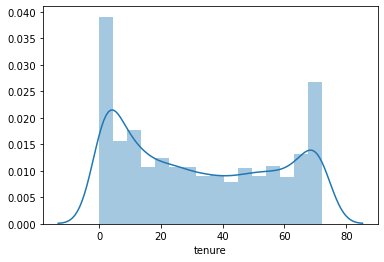

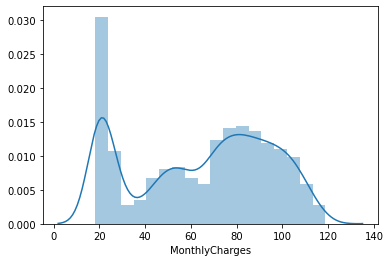

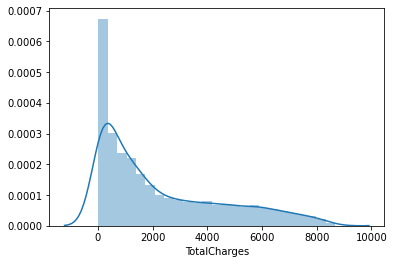

In [45]:
for i in encoded_data[numeric_columns]:
    plt.figure()
    sns.distplot(encoded_data[i])

### Mean Median and skewness in numeric columns

In [46]:

encoded_data[numeric_columns].skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

Mean: 32.37114865824223
Median: 29.0
Mode: 0    1
dtype: int64


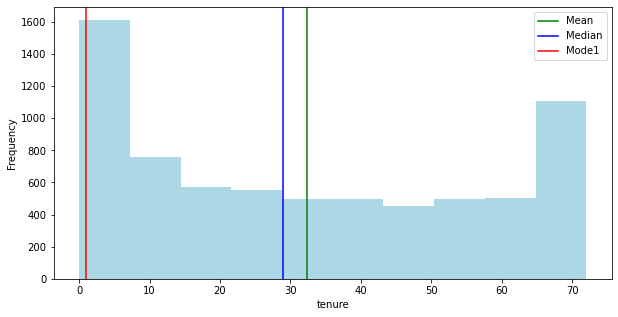

Mean: 64.76169246059922
Median: 70.35
Mode: 0    20.05
dtype: float64


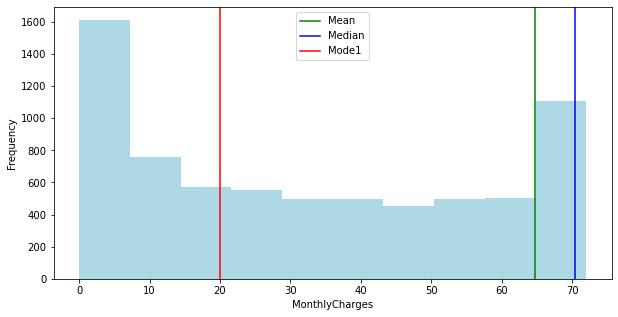

Mean: 2279.734303563826
Median: 1394.55
Mode: 0     0.0
1    20.2
dtype: float64


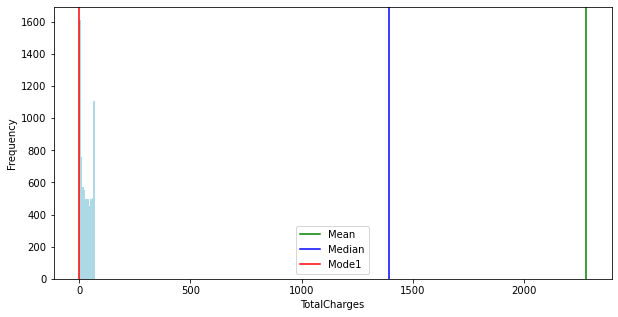

In [47]:
for i in encoded_data[numeric_columns]:
    mean=encoded_data[i].mean()
    median=encoded_data[i].median()
    mode=encoded_data[i].mode()
    print("Mean:",mean)
    print("Median:",median)
    print("Mode:",mode)
    plt.figure(figsize=(10,5)) # set the figure size
    plt.axvline(mean,color='green',label='Mean')     # Draw lines on the plot for mean median and the two modes we have in BMI column
    plt.axvline(median,color='blue',label='Median')
    plt.axvline(mode[0],color='red',label='Mode1')
    plt.hist(encoded_data['tenure'],color='lightblue')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()              # Plot the legend
    plt.show()

### Here we can see that all the three columns are distributed uniformly
### In Tenure column we can see that Mean > Meadian so its slightly right skewed with 0.23 positive skewness
### In Monthly Charges column we can see that Mean< Median so its slightly left skewed with 0.22 negative skewness
### In Total Charges column we can see that Mean > Median so its right skewed with 0.9 right skewness

### Outlier detection for numerical columns

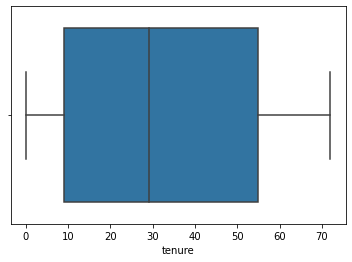

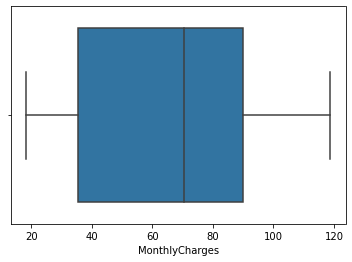

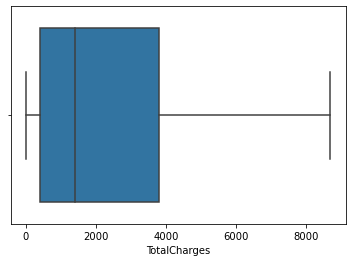

In [48]:
for i in encoded_data[numeric_columns]:
    plt.figure()
    sns.boxplot(encoded_data[i])

#### From the above plots its clear that there are no outliers in any of the numerical columns

### Churn distribution with respect to Categorical features

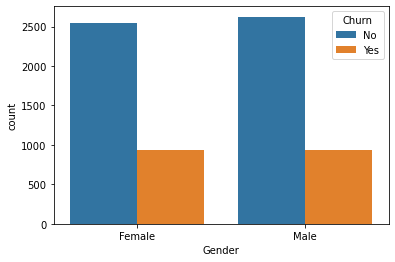

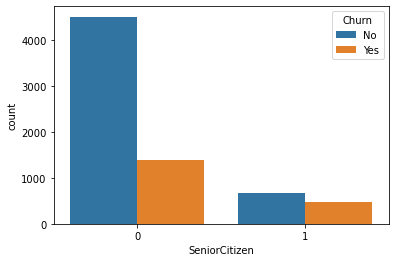

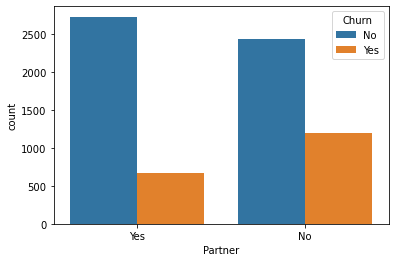

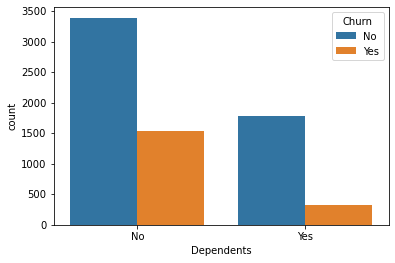

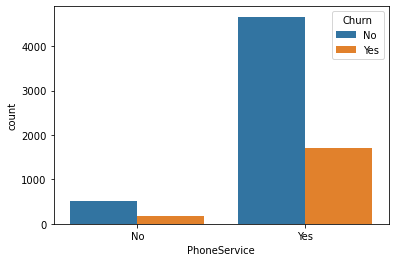

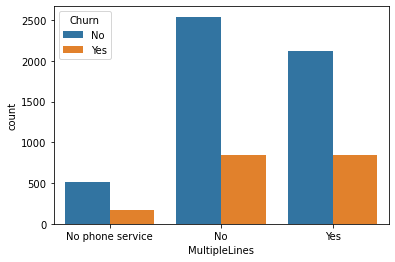

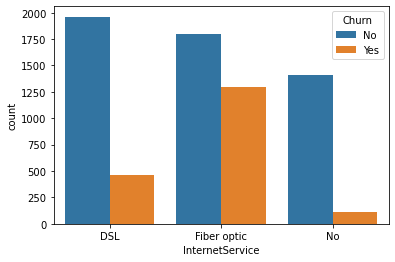

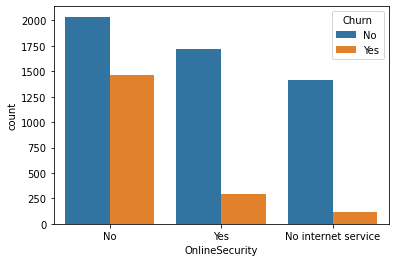

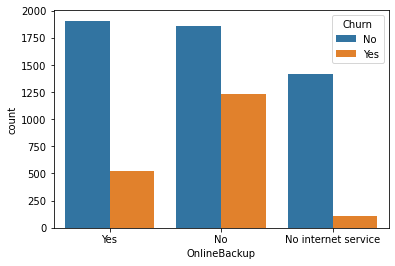

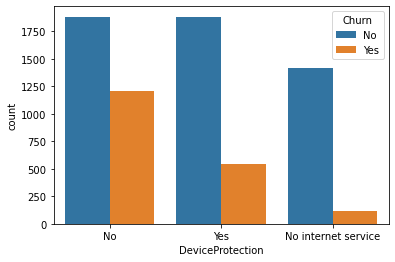

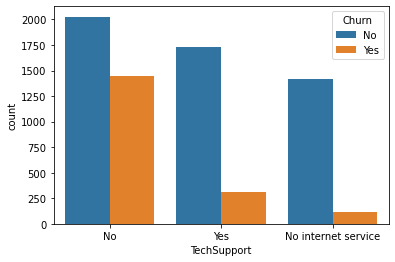

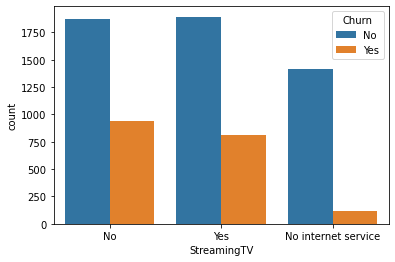

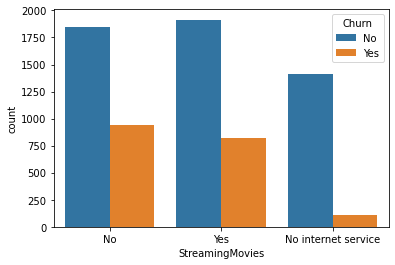

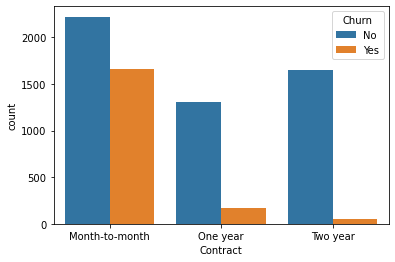

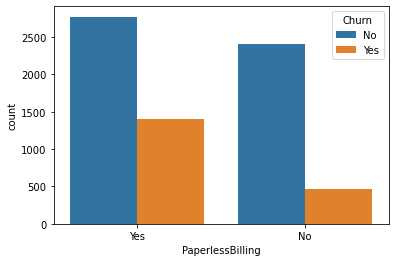

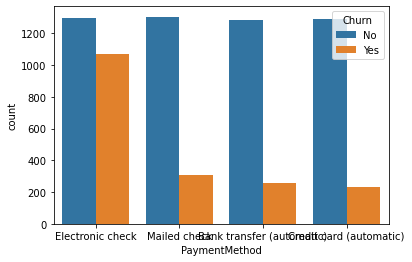

In [49]:
for col in categorical_columns:
    plt.figure()
    sns.countplot(x=col, hue='Churn', data=Dataset)

#### We can notice some of the characteristics of churn customers :
1. Fiber optic
2. month to month contract
3. Paperless billing
4. Electronic check

### Churn distribution with respect to Numerical columns

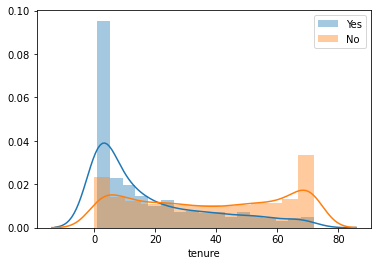

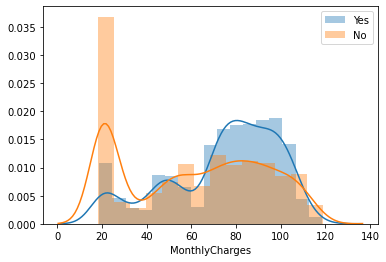

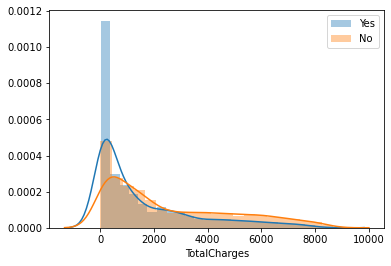

In [50]:
churn = encoded_data[encoded_data['Churn'] == 'Yes']
noChurn =encoded_data[encoded_data['Churn'] == 'No']

for col in numeric_columns:
    plt.figure()
    sns.distplot(churn[col], label='Yes')
    sns.distplot(noChurn[col], label='No')
    plt.legend()

### Customers with high monthly charges and total charges are more likely to churn


### Check the Measure of dispersion

### IQR

In [51]:
 encoded_data[numeric_columns].quantile(0.75)-encoded_data[numeric_columns].quantile(0.25)

tenure              46.00
MonthlyCharges      54.35
TotalCharges      3388.05
dtype: float64

### Variance


In [52]:
 encoded_data[numeric_columns].var()

tenure            6.031681e+02
MonthlyCharges    9.054109e+02
TotalCharges      5.138357e+06
dtype: float64

### Standard deviation

In [53]:
 encoded_data[numeric_columns].std()

tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2266.794470
dtype: float64

### Correlation between numeric columns

In [54]:
Dataset.corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.826178
MonthlyCharges,0.247900,1.000000,0.651174
TotalCharges,0.826178,0.651174,1.000000


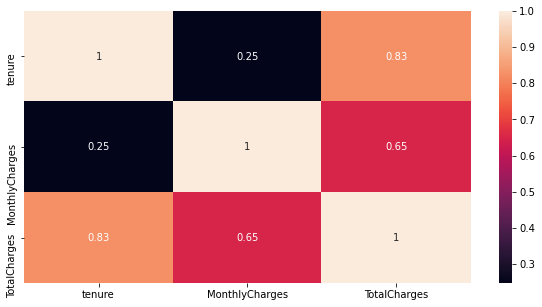

In [55]:
plt.figure(figsize = (10,5))
sns.heatmap(Dataset.corr(),annot=True)

### Tenure and Total charges are positively correlated

### Multivariate analysis

In [ ]:
sns.pairplot(encoded_data);

## 4. Data Preprocessing

#### Creating separate data frames for predictors and target variable


In [ ]:
X = encoded_data.drop(labels= "Churn" , axis = 1)
y = encoded_data["Churn"]

In [ ]:
X.head()

In [ ]:
y.head()

#### Splitting the dataset to training and split dataset.
#### Performing train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#### Checking for target balancing

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
print(X_test.shape)
print(y_test.shape)

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

### Checking the statistical characterstics of train and test sets

In [ ]:
X_train.describe()

In [ ]:
X_test.describe()

In [ ]:
y_train.describe()

In [ ]:
y_test.describe()

## 5. Model Training , Testing and Tuning

### Build Decision Tree Model


In [ ]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

### Scoring our Decision Tree


In [ ]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

#### here we can see that train data is over fitted as it has the maximum score

### Reduce overfitting

In [ ]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

#### By giving the max depth as 3 overfitting is reduced and scores of test and train data sets are almost equal

#### importance of features in the tree building ( The importance of a feature is computed as the 
#### (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


In [ ]:

print (pd.DataFrame(dTreeR.feature_importances_, columns = ["Imp"], index = X_train.columns))

### Total Charges, InternetService_FiberOptic, Contract Month-to-Month are some of the important features in the tree building

### Confusion matrix for Decision Tree model

In [ ]:
from sklearn import metrics
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=['No', 'Yes'])
df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["predict_No","predict_Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### accuracy score for decision tree model is 79.7%

### Ensemble Learning - Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTreeR, n_estimators=50,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train, y_train)

In [ ]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=["No", "Yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict_No","Predict_Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Acurracy score for building a model using bagging technique is 80% 

### Ensemble Learning - AdaBoosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

In [ ]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=["No", "Yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict_No","Predict_Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Acurracy score for building a model using ada boosting technique is 79.2% 

### Ensemble learning- Gradient Boosting


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [ ]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=["No", "Yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["Predict_No","Predict_Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Acurracy score for building a model using gradient boosting technique is 80.3% 

### Ensemble RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

In [ ]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=["No", "Yes"])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["predict_No","predict_Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

### Acurracy score for building a model using Random Forest Classifier is 80.3% 

### It is clear that Model using gradient boosting and Random Forest classifier has the highest accuracy

### I am choosing Gradient boosting model for further process as gradient boosting combines the results on the way by improving the short comings of the weak points. This can be very suitable for the data that is a bit unbalanced

## 6. GUI Development

In [ ]:
import pickle    

Model = pickle.dumps(rfcl)

In [ ]:

import tkinter as tk

from tkinter import ttk as ttk

win = tk.Tk()

win.title('Customer Churn Predictions') 
#Column 1 
Gender_female=ttk.Label(win,text="Gender_female")
Gender_female.grid(row=0,column=0,sticky=tk.W)
Gender_female_var=tk.StringVar()
Gender_female_entrybox=ttk.Entry(win,width=16,textvariable=Gender_female_var)
Gender_female_entrybox.grid(row=0,column=1)
#Column 2
Gender_male=ttk.Label(win,text="Gender_male")
Gender_male.grid(row=1,column=0,sticky=tk.W)
Gender_male_var=tk.StringVar()
Gender_male_entrybox=ttk.Entry(win,width=16,textvariable=Gender_male_var)
Gender_male_entrybox.grid(row=1,column=1)
#Column 3
SeniorCitizen_0=ttk.Label(win,text="SeniorCitizen_0")
SeniorCitizen_0.grid(row=2,column=0,sticky=tk.W)
SeniorCitizen_0_var=tk.StringVar()
SeniorCitizen_0_entrybox=ttk.Entry(win,width=16,textvariable=SeniorCitizen_0_var)
SeniorCitizen_0_entrybox.grid(row=2,column=1)
#Column 4
SeniorCitizen_1=ttk.Label(win,text="SeniorCitizen_1")
SeniorCitizen_1.grid(row=3,column=0,sticky=tk.W)
SeniorCitizen_1_var=tk.StringVar()
SeniorCitizen_1_entrybox=ttk.Entry(win,width=16,textvariable=SeniorCitizen_1_var)
SeniorCitizen_1_entrybox.grid(row=3,column=1)
#Column 5
Partner_Yes=ttk.Label(win,text="Partner_Yes")
Partner_Yes.grid(row=4,column=0,sticky=tk.W)
Partner_Yes_var=tk.StringVar()
Partner_Yes_entrybox=ttk.Entry(win,width=16,textvariable=Partner_Yes_var)
Partner_Yes_entrybox.grid(row=4,column=1)
#Column 6
Partner_No=ttk.Label(win,text="Partner_No")
Partner_No.grid(row=5,column=0,sticky=tk.W)
Partner_No_var=tk.StringVar()
Partner_No_entrybox=ttk.Entry(win,width=16,textvariable=Partner_No_var)
Partner_No_entrybox.grid(row=5,column=1)
#Column 7
Dependents_Yes=ttk.Label(win,text="Dependents_Yes")
Dependents_Yes.grid(row=6,column=0,sticky=tk.W)
Dependents_Yes_var=tk.StringVar()
Dependents_Yes_entrybox=ttk.Entry(win,width=16,textvariable=Dependents_Yes_var)
Dependents_Yes_entrybox.grid(row=6,column=1)
#Column 8
Dependents_No=ttk.Label(win,text="Dependents_No")
Dependents_No.grid(row=7,column=0,sticky=tk.W)
Dependents_No_var=tk.StringVar()
Dependents_No_entrybox=ttk.Entry(win,width=16,textvariable=Dependents_No_var)
Dependents_No_entrybox.grid(row=7,column=1)
#Column 9
Tenure=ttk.Label(win,text="Tenure")
Tenure.grid(row=8,column=0,sticky=tk.W)
Tenure_var=tk.StringVar()
Tenure_entrybox=ttk.Entry(win,width=16,textvariable=Tenure_var)
Tenure_entrybox.grid(row=8,column=1)
#Column 10
PhoneService_Yes=ttk.Label(win,text="PhoneService_Yes")
PhoneService_Yes.grid(row=9,column=0,sticky=tk.W)
PhoneService_Yes_var=tk.StringVar()
PhoneService_Yes_entrybox=ttk.Entry(win,width=16,textvariable=PhoneService_Yes_var)
PhoneService_Yes_entrybox.grid(row=9,column=1)
#Column 11
PhoneService_No=ttk.Label(win,text="PhoneService_No")
PhoneService_No.grid(row=10,column=0,sticky=tk.W)
PhoneService_No_var=tk.StringVar()
PhoneService_No_entrybox=ttk.Entry(win,width=16,textvariable=PhoneService_No_var)
PhoneService_No_entrybox.grid(row=10,column=1)
#Column 12
MultipleLines_No_phone_service=ttk.Label(win,text="MultipleLines_No phone service")
MultipleLines_No_phone_service.grid(row=11,column=0,sticky=tk.W)
MultipleLines_No_phone_service_var=tk.StringVar()
MultipleLines_No_phone_service_entrybox=ttk.Entry(win,width=16,textvariable= MultipleLines_No_phone_service_var)
MultipleLines_No_phone_service_entrybox.grid(row=11,column=1)\
#Column 13
MultipleLines_No=ttk.Label(win,text="MultipleLines_No")
MultipleLines_No.grid(row=12,column=0,sticky=tk.W)
MultipleLines_No_var=tk.StringVar()
MultipleLines_No_entrybox=ttk.Entry(win,width=16,textvariable=MultipleLines_No_var)
MultipleLines_No_entrybox.grid(row=12,column=1)
#Column 14
MultipleLines_Yes=ttk.Label(win,text="MultipleLines_Yes")
MultipleLines_Yes.grid(row=13,column=0,sticky=tk.W)
MultipleLines_Yes_var=tk.StringVar()
MultipleLines_Yes_entrybox=ttk.Entry(win,width=16,textvariable=MultipleLines_Yes_var)
MultipleLines_Yes_entrybox.grid(row=13,column=1)
#Column 15
InternetService_Fiber_optic=ttk.Label(win,text="InternetService_Fiber_optic")
InternetService_Fiber_optic.grid(row=14,column=0,sticky=tk.W)
InternetService_Fiber_optic_var=tk.StringVar()
InternetService_Fiber_optic_entrybox=ttk.Entry(win,width=16,textvariable=InternetService_Fiber_optic_var)
InternetService_Fiber_optic_entrybox.grid(row=14,column=1)
#Column 16
InternetService_DSL=ttk.Label(win,text="InternetService_DSL")
InternetService_DSL.grid(row=15,column=0,sticky=tk.W)
InternetService_DSL_var=tk.StringVar()
InternetService_DSL_entrybox=ttk.Entry(win,width=16,textvariable=InternetService_DSL_var)
InternetService_DSL_entrybox.grid(row=15,column=1)
#Column 17
InternetService_No=ttk.Label(win,text="InternetService_No")
InternetService_No.grid(row=16,column=0,sticky=tk.W)
InternetService_No_var=tk.StringVar()
InternetService_No_entrybox=ttk.Entry(win,width=16,textvariable=InternetService_No_var)
InternetService_No_entrybox.grid(row=16,column=1)
#Column 18
OnlineSecurity_No_internet_service=ttk.Label(win,text="OnlineSecurity_No_internet_service")
OnlineSecurity_No_internet_service.grid(row=17,column=0,sticky=tk.W)
OnlineSecurity_No_internet_service_var=tk.StringVar()
OnlineSecurity_No_internet_service_entrybox=ttk.Entry(win,width=16,textvariable=OnlineSecurity_No_internet_service_var)
OnlineSecurity_No_internet_service_entrybox.grid(row=17,column=1)
#Column 19
OnlineSecurity_No=ttk.Label(win,text="OnlineSecurity_No")
OnlineSecurity_No.grid(row=18,column=0,sticky=tk.W)
OnlineSecurity_No_var=tk.StringVar()
OnlineSecurity_No_entrybox=ttk.Entry(win,width=16,textvariable=OnlineSecurity_No_var)
OnlineSecurity_No_entrybox.grid(row=18,column=1)
#Column 20
OnlineSecurity_Yes=ttk.Label(win,text="OnlineSecurity_Yes")
OnlineSecurity_Yes.grid(row=19,column=0,sticky=tk.W)
OnlineSecurity_Yes_var=tk.StringVar()
OnlineSecurity_Yes_entrybox=ttk.Entry(win,width=16,textvariable=OnlineSecurity_Yes_var)
OnlineSecurity_Yes_entrybox.grid(row=19,column=1)
#Column 21
OnlineBackup_No_internet_service=ttk.Label(win,text="OnlineBackup_No_internet_service")
OnlineBackup_No_internet_service.grid(row=20,column=0,sticky=tk.W)
OnlineBackup_No_internet_service_var=tk.StringVar()
OnlineBackup_No_internet_service_entrybox=ttk.Entry(win,width=16,textvariable=OnlineBackup_No_internet_service_var)
OnlineBackup_No_internet_service_entrybox.grid(row=20,column=1)
#Column 22
OnlineBackup_No=ttk.Label(win,text="OnlineBackup_No")
OnlineBackup_No.grid(row=21,column=0,sticky=tk.W)
OnlineBackup_No_var=tk.StringVar()
OnlineBackup_No_entrybox=ttk.Entry(win,width=16,textvariable=OnlineBackup_No_var)
OnlineBackup_No_entrybox.grid(row=21,column=1)
#Column 23
OnlineBackup_Yes=ttk.Label(win,text="OnlineBackup_Yes")
OnlineBackup_Yes.grid(row=22,column=0,sticky=tk.W)
OnlineBackup_Yes_var=tk.StringVar()
OnlineBackup_Yes_entrybox=ttk.Entry(win,width=16,textvariable=OnlineBackup_Yes_var)
OnlineBackup_Yes_entrybox.grid(row=22,column=1)
#Column 24
DeviceProtection_No_internet_service=ttk.Label(win,text="DeviceProtection_No_internet_service")
DeviceProtection_No_internet_service.grid(row=23,column=0,sticky=tk.W)
DeviceProtection_No_internet_service_var=tk.StringVar()
DeviceProtection_No_internet_service_entrybox=ttk.Entry(win,width=16,textvariable=DeviceProtection_No_internet_service_var)
DeviceProtection_No_internet_service_entrybox.grid(row=23,column=1)
#Column 25
DeviceProtection_No=ttk.Label(win,text="DeviceProtection_No")
DeviceProtection_No.grid(row=24,column=0,sticky=tk.W)
DeviceProtection_No_var=tk.StringVar()
DeviceProtection_No_entrybox=ttk.Entry(win,width=16,textvariable=DeviceProtection_No_var)
DeviceProtection_No_entrybox.grid(row=24,column=1)
#Column 26
DeviceProtection_Yes=ttk.Label(win,text="DeviceProtection_Yes")
DeviceProtection_Yes.grid(row=25,column=0,sticky=tk.W)
DeviceProtection_Yes_var=tk.StringVar()
DeviceProtection_Yes_entrybox=ttk.Entry(win,width=16,textvariable=DeviceProtection_Yes_var)
DeviceProtection_Yes_entrybox.grid(row=25,column=1)
#Column 27
TechSupport_No_internet_service=ttk.Label(win,text="TechSupport_No_internet_service")
TechSupport_No_internet_service.grid(row=26,column=0,sticky=tk.W)
TechSupport_No_internet_service_var=tk.StringVar()
TechSupport_No_internet_service_entrybox=ttk.Entry(win,width=16,textvariable=TechSupport_No_internet_service_var)
TechSupport_No_internet_service_entrybox.grid(row=26,column=1)
#Column 28
TechSupport_No=ttk.Label(win,text="TechSupport_No")
TechSupport_No.grid(row=27,column=0,sticky=tk.W)
TechSupport_No_var=tk.StringVar()
TechSupport_No_entrybox=ttk.Entry(win,width=16,textvariable=TechSupport_No_var)
TechSupport_No_entrybox.grid(row=27,column=1)
#Column 29
TechSupport_Yes=ttk.Label(win,text="TechSupport_Yes")
TechSupport_Yes.grid(row=28,column=0,sticky=tk.W)
TechSupport_Yes_var=tk.StringVar()
TechSupport_Yes_entrybox=ttk.Entry(win,width=16,textvariable=TechSupport_Yes_var)
TechSupport_Yes_entrybox.grid(row=28,column=1)
#Column 30
StreamingTV_No_internet_service=ttk.Label(win,text="StreamingTV_No_internet_service")
StreamingTV_No_internet_service.grid(row=29,column=0,sticky=tk.W)
StreamingTV_No_internet_service_var=tk.StringVar()
StreamingTV_No_internet_service_entrybox=ttk.Entry(win,width=16,textvariable=StreamingTV_No_internet_service_var)
StreamingTV_No_internet_service_entrybox.grid(row=29,column=1)
#Column 31
StreamingTV_No=ttk.Label(win,text="StreamingTV_No")
StreamingTV_No.grid(row=1,column=2,sticky=tk.W)
StreamingTV_No_var=tk.StringVar()
StreamingTV_No_entrybox=ttk.Entry(win,width=16,textvariable=StreamingTV_No_var)
StreamingTV_No_entrybox.grid(row=1,column=3)
#Column 32
StreamingTV_Yes=ttk.Label(win,text="StreamingTV_Yes")
StreamingTV_Yes.grid(row=2,column=2,sticky=tk.W)
StreamingTV_Yes_var=tk.StringVar()
StreamingTV_Yes_entrybox=ttk.Entry(win,width=16,textvariable=StreamingTV_Yes_var)
StreamingTV_Yes_entrybox.grid(row=2,column=3)
#Column 33
StreamingMovies_No_internet_service=ttk.Label(win,text="StreamingMovies_No_internet_service")
StreamingMovies_No_internet_service.grid(row=3,column=2,sticky=tk.W)
StreamingMovies_No_internet_service_var=tk.StringVar()
StreamingMovies_No_internet_service_entrybox=ttk.Entry(win,width=16,textvariable=StreamingMovies_No_internet_service_var)
StreamingMovies_No_internet_service_entrybox.grid(row=3,column=3)
#Column 34
StreamingMovies_No=ttk.Label(win,text="StreamingMovies_No")
StreamingMovies_No.grid(row=4,column=2,sticky=tk.W)
StreamingMovies_No_var=tk.StringVar()
StreamingMovies_No_entrybox=ttk.Entry(win,width=16,textvariable=StreamingMovies_No_var)
StreamingMovies_No_entrybox.grid(row=4,column=3)
#Column 35
StreamingMovies_Yes=ttk.Label(win,text="StreamingMovies_Yes")
StreamingMovies_Yes.grid(row=5,column=2,sticky=tk.W)
StreamingMovies_Yes_var=tk.StringVar()
StreamingMovies_Yes_entrybox=ttk.Entry(win,width=16,textvariable=StreamingMovies_Yes_var)
StreamingMovies_Yes_entrybox.grid(row=5,column=3)
#Column 36
Contract_Month_to_month=ttk.Label(win,text="Contract_Month_to_month")
Contract_Month_to_month.grid(row=6,column=2,sticky=tk.W)
Contract_Month_to_month_var=tk.StringVar()
Contract_Month_to_month_entrybox=ttk.Entry(win,width=16,textvariable=Contract_Month_to_month_var)
Contract_Month_to_month_entrybox.grid(row=6,column=3)
#Column 37
Contract_One_year=ttk.Label(win,text="Contract_One_year")
Contract_One_year.grid(row=7,column=2,sticky=tk.W)
Contract_One_year_var=tk.StringVar()
Contract_One_year_entrybox=ttk.Entry(win,width=16,textvariable=Contract_One_year_var)
Contract_One_year_entrybox.grid(row=7,column=3)
#Column 38
Contract_Two_year=ttk.Label(win,text="Contract_Two_year")
Contract_Two_year.grid(row=8,column=2,sticky=tk.W)
Contract_Two_year_var=tk.StringVar()
Contract_Two_year_entrybox=ttk.Entry(win,width=16,textvariable=Contract_Two_year_var)
Contract_Two_year_entrybox.grid(row=8,column=3)
#Column 39
PaperlessBilling_No=ttk.Label(win,text="PaperlessBilling_No")
PaperlessBilling_No.grid(row=9,column=2,sticky=tk.W)
PaperlessBilling_No_var=tk.StringVar()
PaperlessBilling_No_entrybox=ttk.Entry(win,width=16,textvariable=PaperlessBilling_No_var)
PaperlessBilling_No_entrybox.grid(row=9,column=3)
#Column 40
PaperlessBilling_Yes=ttk.Label(win,text="PaperlessBilling_Yes")
PaperlessBilling_Yes.grid(row=10,column=2,sticky=tk.W)
PaperlessBilling_Yes_var=tk.StringVar()
PaperlessBilling_Yes_entrybox=ttk.Entry(win,width=16,textvariable=PaperlessBilling_Yes_var)
PaperlessBilling_Yes_entrybox.grid(row=10,column=3)
#Column 41
PaymentMethod_Bank_transfer=ttk.Label(win,text="PaymentMethod_Bank_transfer")
PaymentMethod_Bank_transfer.grid(row=11,column=2,sticky=tk.W)
PaymentMethod_Bank_transfer_var=tk.StringVar()
PaymentMethod_Bank_transfer_entrybox=ttk.Entry(win,width=16,textvariable=PaymentMethod_Bank_transfer_var)
PaymentMethod_Bank_transfer_entrybox.grid(row=11,column=3)
#Column 42
PaymentMethod_Credit_card=ttk.Label(win,text="PaymentMethod_Credit_card")
PaymentMethod_Credit_card.grid(row=12,column=2,sticky=tk.W)
PaymentMethod_Credit_card_var=tk.StringVar()
PaymentMethod_Credit_card_entrybox=ttk.Entry(win,width=16,textvariable=PaymentMethod_Credit_card_var)
PaymentMethod_Credit_card_entrybox.grid(row=12,column=3)
#Column 43
PaymentMethod_Electronic_check=ttk.Label(win,text="PaymentMethod_Electronic_check")
PaymentMethod_Electronic_check.grid(row=13,column=2,sticky=tk.W)
PaymentMethod_Electronic_check_var=tk.StringVar()
PaymentMethod_Electronic_check_entrybox=ttk.Entry(win,width=16,textvariable=PaymentMethod_Electronic_check_var)
PaymentMethod_Electronic_check_entrybox.grid(row=13,column=3)
#Column 44
PaymentMethod_Mailed_check=ttk.Label(win,text="PaymentMethod_Mailed_check")
PaymentMethod_Mailed_check.grid(row=14,column=2,sticky=tk.W)
PaymentMethod_Mailed_check_var=tk.StringVar()
PaymentMethod_Mailed_check_entrybox=ttk.Entry(win,width=16,textvariable=PaymentMethod_Mailed_check_var)
PaymentMethod_Mailed_check_entrybox.grid(row=14,column=3)
#Column 45
MonthlyCharges=ttk.Label(win,text="MonthlyCharges")
MonthlyCharges.grid(row=15,column=2,sticky=tk.W)
MonthlyCharges_var=tk.StringVar()
MonthlyCharges_entrybox=ttk.Entry(win,width=16,textvariable=MonthlyCharges_var)
MonthlyCharges_entrybox.grid(row=15,column=3)
#Column 46
TotalCharges=ttk.Label(win,text="TotalCharges")
TotalCharges.grid(row=16,column=2,sticky=tk.W)
TotalCharges_var=tk.StringVar()
TotalCharges_entrybox=ttk.Entry(win,width=16,textvariable=TotalCharges_var)
TotalCharges_entrybox.grid(row=16,column=3)



In [ ]:
import pandas as pd
DF = pd.DataFrame()
result=""
Gender_female=""
def action():
    global DB
    import pandas as pd
    DF = pd.DataFrame(columns=['tenure', 'MonthlyCharges', 'TotalCharges', 'Gender_Female',
       'Gender_Male', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'])
    Gender_female=Gender_female_var.get()
    DF.loc[0,'Gender_female']=Gender_female
    Gender_male=Gender_male_var.get()
    DF.loc[0,'Gender_female']=Gender_male
    SeniorCitizen_0=SeniorCitizen_0_var.get()
    DF.loc[0,'SeniorCitizen_0']=SeniorCitizen_0
    SeniorCitizen_1=SeniorCitizen_1_var.get()
    DF.loc[0,'SeniorCitizen_1']=SeniorCitizen_1
    Partner_Yes=Partner_Yes_var.get()
    DF.loc[0,'Partner_Yes']=Partner_Yes
    Partner_No=Partner_No_var.get()
    DF.loc[0,'Partner_No']=Partner_No
    Dependents_Yes=Dependents_Yes_var.get()
    DF.loc[0,'Dependents_Yes']=Dependents_Yes
    Dependents_No=Dependents_No_var.get()
    DF.loc[0,'Dependents_No']=Dependents_No
    PhoneService_Yes= PhoneService_Yes_var.get()
    DF.loc[0,'PhoneService_Yes']= PhoneService_Yes
    PhoneService_No= PhoneService_No_var.get()
    DF.loc[0,'PhoneService_No']= PhoneService_No
    MultipleLines_Yes= MultipleLines_Yes_var.get()
    DF.loc[0,'MultipleLines_Yes']= MultipleLines_Yes
    MultipleLines_No= MultipleLines_No_var.get()
    DF.loc[0,'MultipleLines_No']= MultipleLines_No
    MultipleLines_No_phone_service= MultipleLines_No_phone_service_var.get()
    DF.loc[0,'MultipleLines_No phone service']= MultipleLines_No_phone_service
    InternetService_DSL=InternetService_DSL_var.get()
    DF.loc[0,'InternetService_DSL']= InternetService_DSL
    InternetService_No=InternetService_No_var.get()
    DF.loc[0,'InternetService_No']= InternetService_No
    InternetService_Fiber_optic=InternetService_Fiber_optic_var.get()
    DF.loc[0,'InternetService_Fiber optic']= InternetService_Fiber_optic
    OnlineSecurity_No=OnlineSecurity_No_var.get()
    DF.loc[0,'OnlineSecurity_No']= OnlineSecurity_No
    OnlineSecurity_Yes=OnlineSecurity_Yes_var.get()
    DF.loc[0,'OnlineSecurity_Yes']= OnlineSecurity_Yes
    OnlineSecurity_No_internet_service=OnlineSecurity_No_internet_service_var.get()
    DF.loc[0,'OnlineSecurity_No internet service']= OnlineSecurity_No_internet_service
    OnlineBackup_No=OnlineBackup_No_var.get()
    DF.loc[0,'OnlineBackup_No']= OnlineBackup_No
    OnlineBackup_Yes=OnlineBackup_Yes_var.get()
    DF.loc[0,'OnlineBackup_Yes']= OnlineBackup_Yes
    OnlineBackup_No_internet_service=OnlineBackup_No_internet_service_var.get()
    DF.loc[0,'OnlineBackup_No internet service']= OnlineBackup_No_internet_service
    DeviceProtection_No=DeviceProtection_No_var.get()
    DF.loc[0,'DeviceProtection_No']= DeviceProtection_No
    DeviceProtection_Yes=DeviceProtection_Yes_var.get()
    DF.loc[0,'DeviceProtection_Yes']= DeviceProtection_Yes
    DeviceProtection_No_internet_service=DeviceProtection_No_internet_service_var.get()
    DF.loc[0,'DeviceProtection_No internet service']= DeviceProtection_No_internet_service
    TechSupport_No=TechSupport_No_var.get()
    DF.loc[0,'TechSupport_No']= TechSupport_No
    TechSupport_Yes=TechSupport_Yes_var.get()
    DF.loc[0,'TechSupport_Yes']= TechSupport_Yes
    TechSupport_No_internet_service=TechSupport_No_internet_service_var.get()
    DF.loc[0,'TechSupport_No internet service']= TechSupport_No_internet_service
    
    StreamingTV_No=StreamingTV_No_var.get()
    DF.loc[0,'StreamingTV_No']= StreamingTV_No
    StreamingTV_Yes=StreamingTV_Yes_var.get()
    DF.loc[0,'StreamingTV_Yes']= StreamingTV_Yes
    SStreamingTV_No_internet_service=StreamingTV_No_internet_service_var.get()
    DF.loc[0,'StreamingTV_No internet service']= StreamingTV_No_internet_service
    StreamingMovies_No=StreamingMovies_No_var.get()
    DF.loc[0,'StreamingMovies_No']= StreamingMovies_No
    StreamingMovies_Yes=StreamingMovies_Yes_var.get()
    DF.loc[0,'StreamingMovies_Yes']= StreamingMovies_Yes
    SStreamingMovies_No_internet_service=StreamingMovies_No_internet_service_var.get()
    DF.loc[0,'StreamingMovies_No internet service']= StreamingMovies_No_internet_service
    Contract_Month_to_month=Contract_Month_to_month_var.get()
    DF.loc[0,'Contract_Month-to-month']= Contract_Month_to_month
    Contract_One_year=Contract_One_year_var.get()
    DF.loc[0,'Contract_One year']= Contract_One_year
    Contract_Two_year=Contract_Two_year_var.get()
    DF.loc[0,'Contract_Two year']= Contract_Two_year
    PaperlessBilling_No=PaperlessBilling_No_var.get()
    DF.loc[0,'PaperlessBilling_No']= PaperlessBilling_No
    PaperlessBilling_Yes=PaperlessBilling_Yes_var.get()
    DF.loc[0,'PaperlessBilling_Yes']= PaperlessBilling_Yes
    PaymentMethod_Bank_transfer=PaymentMethod_Bank_transfer_var.get()
    DF.loc[0,'PaymentMethod_Bank transfer (automatic)']= PaymentMethod_Bank_transfer
    PaymentMethod_Credit_card=PaymentMethod_Credit_card_var.get()
    DF.loc[0,'PaymentMethod_Credit card (automatic)']= PaymentMethod_Credit_card
    PaymentMethod_Electronic_check=PaymentMethod_Electronic_check_var.get()
    DF.loc[0,'PaymentMethod_Electronic check']= PaymentMethod_Electronic_check
    PaymentMethod_Mailed_check=PaymentMethod_Mailed_check_var.get()
    DF.loc[0,'PaymentMethod_Mailed check']=PaymentMethod_Mailed_check
    Tenure=Tenure_var.get()
    DF.loc[0,'tenure']=Tenure
    TotalCharges=TotalCharges_var.get()
    DF.loc[0,'TotalCharges']=Tenure
    MonthlyCharges=MonthlyCharges_var.get()
    DF.loc[0,'MonthlyCharges']=MonthlyCharges
    convert_dict = {'tenure':int, 'MonthlyCharges':int, 'TotalCharges':int, 'Gender_Female':int,
       'Gender_Male':int, 'SeniorCitizen_0':int, 'SeniorCitizen_1':int, 'Partner_No':int,
       'Partner_Yes':int, 'Dependents_No':int, 'Dependents_Yes':int, 'PhoneService_No':int,
       'PhoneService_Yes':int, 'MultipleLines_No':int,
       'MultipleLines_No phone service':int, 'MultipleLines_Yes':int,
       'InternetService_DSL':int, 'InternetService_Fiber optic':int,
       'InternetService_No':int, 'OnlineSecurity_No':int,
       'OnlineSecurity_No internet service':int, 'OnlineSecurity_Yes':int,
       'OnlineBackup_No':int, 'OnlineBackup_No internet service':int,
       'OnlineBackup_Yes':int, 'DeviceProtection_No':int,
       'DeviceProtection_No internet service':int, 'DeviceProtection_Yes':int,
       'TechSupport_No':int, 'TechSupport_No internet service':int, 'TechSupport_Yes':int,
       'StreamingTV_No':int, 'StreamingTV_No internet service':int, 'StreamingTV_Yes':int,
       'StreamingMovies_No':int, 'StreamingMovies_No internet service':int,
       'StreamingMovies_Yes':int, 'Contract_Month-to-month':int, 'Contract_One year':int,
       'Contract_Two year':int, 'PaperlessBilling_No':int, 'PaperlessBilling_Yes':int,
       'PaymentMethod_Bank transfer (automatic)':int,
       'PaymentMethod_Credit card (automatic)':int,
       'PaymentMethod_Electronic check':int, 'PaymentMethod_Mailed check':int
               } 
    DF = DF.astype(convert_dict) 

    output=Model.predict(DF)
    if output=='Yes':
        result='Churn'
        return result
    elif output=='No':
        result='No Churn'
        return result
    
    

    

  
    

In [ ]:
Predict_entrybox=ttk.Entry(win,width=16)
Predict_entrybox.grid(row=30,column=3)
Predict_entrybox.insert(1,str(result))
Predict_button=ttk.Button(win,text="Predict",command=action)
Predict_button.grid(row=30,column=4)

win.mainloop()



## 7. Conclusion

###  With Agradient boosting  and some optimization elements, we managed to obtain a model able to detect 82% of TELCO's customers who went to churn.

#### We can notice some of the characteristics of churn customers :
1. Fiber optic
2. month to month contract
3. Paperless billing
4. Electronic check

### Tenure and Contract duration seems to be strong factors in determining churn.
### Among service types, phone service seems to be most popular.
### Should investigate if customers receiving digital invoice have any concern with understanding the bill details.
### Also, they should encourage customers to move to automated payment modes to improve customer experience.
### Gender does not play an important role. However, should take care of the experience of senior citizens.